In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("/Users/lucasmazza/Desktop/airbnbdata/airbnb.csv")

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.shape[0]

48895

In [33]:
#removing non relevant data / columns with alot of missing data
df = df.drop('host_id', axis = 1)
df = df.drop('name', axis = 1)
#we know that NAN valus in the reviews columns just mean there was no data collected on it / didnt exist
df.fillna(0, inplace=True)


In [34]:
newSet = df[['latitude','longitude','neighbourhood_group','room_type','price']].copy()
#set the neighborhood_group
newSet = newSet.loc[newSet['neighbourhood_group'] =='Brooklyn']
#type of room is only "Entire home/apt"
newSet = newSet.loc[newSet['room_type'] =='Entire home/apt']

#clustering will be done with lat and long values
finalSet = newSet[['latitude','longitude']]

finalSet

,latitude,longitude
3,40.68514,-73.95976
15,40.70837,-73.95352
16,40.69169,-73.97185
18,40.67592,-73.94694
20,40.71842,-73.95718
...,...,...
48870,40.71197,-73.94946
48873,40.63116,-73.92616
48879,40.71728,-73.94394
48880,40.71232,-73.94220


/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

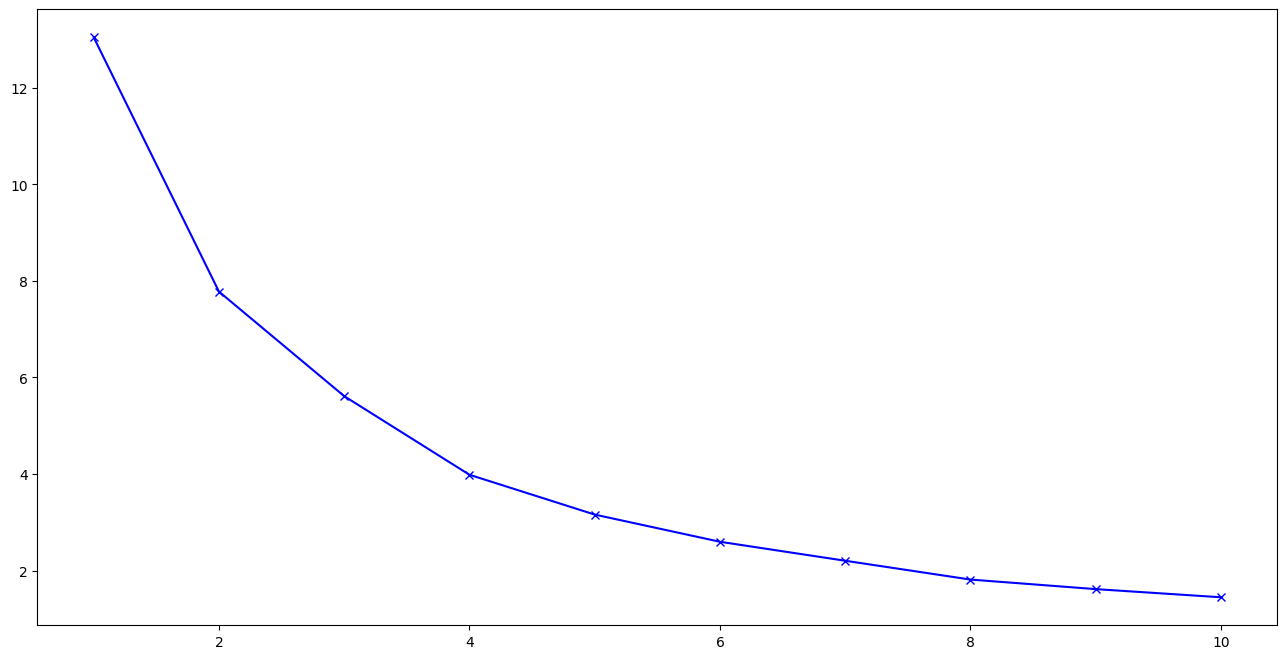

In [9]:
distortions = []
plt.figure(figsize=(16,8))
K = range(1,11)
for k in K: 
    Kmean = KMeans(n_clusters = k)
    Kmean.fit(finalSet)
    distortions.append(Kmean.inertia_)

plt.plot(K, distortions, 'bx-')

#Elbow visually indicated to be 6
#sum of cluster of squares begins to decrease linearly

In [51]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
plt.figure(figsize=(25,12))
visualizer.fit(finalSet)        # Fit the data to the visualizer
visualizer.show() 


NameError: name 'SilhouetteVisualizer' is not defined

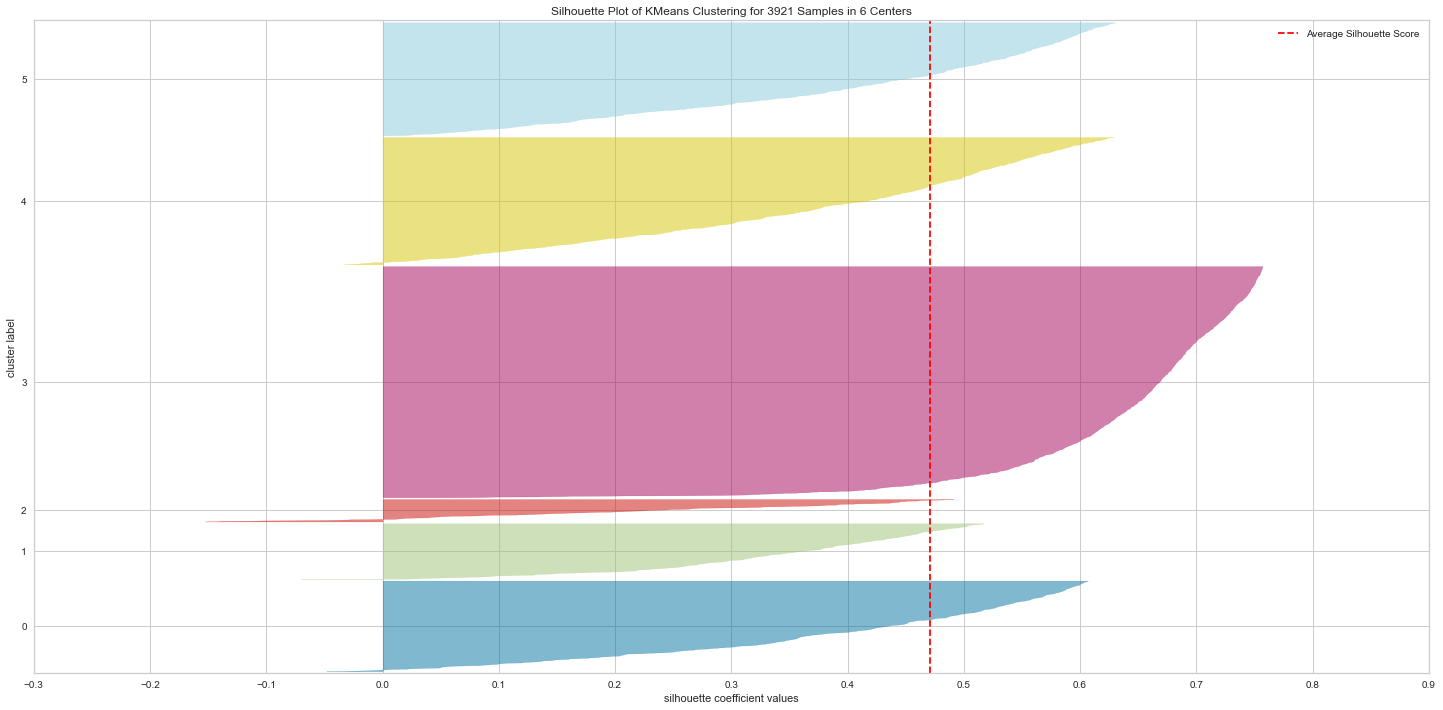

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3921 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
model = KMeans(6)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
plt.figure(figsize=(25,12))
visualizer.fit(finalSet)        # Fit the data to the visualizer
visualizer.show() 
#slightly more area covered by the average, more area above average
#a little more standard in shape than 5

In [ ]:
#find centroids for n = 6
KmeanS = KMeans(n_clusters=6)
KmeanS.fit(finalSet)
KmeanS.cluster_centers_
KmeanS.labels_

array([2, 0, 3, ..., 3, 1, 0], dtype=int32)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

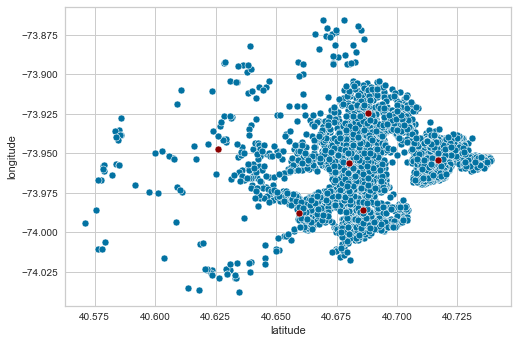

In [ ]:

dataCentroids = pd.DataFrame([[ 40.68818561, -73.92437669],
       [ 40.71687675, -73.95424817],
       [ 40.68574887, -73.98560003],
       [ 40.68032383, -73.95626492],
       [ 40.62607551, -73.94713833],
       [ 40.65965715, -73.98749564]], columns = ['x','y'])

sns.scatterplot(data = finalSet, x = 'latitude', y = 'longitude')
sns.scatterplot(data = dataCentroids, x = 'x', y = 'y',color = 'darkred')
#centroids colored in red

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

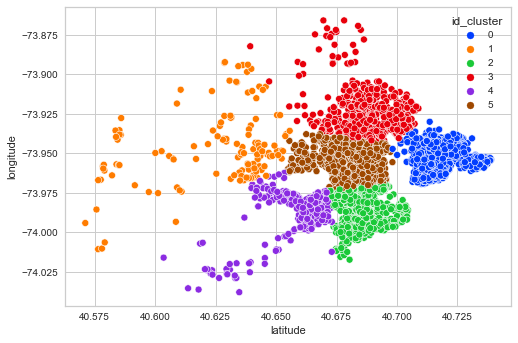

In [ ]:
finalSet['id_cluster'] = KmeanS.labels_
finalSet.head()
sns.scatterplot(data = finalSet, x = 'latitude', y = 'longitude',hue = 'id_cluster',palette = 'bright')

In [ ]:
test =np.array([40.54,-73.10])
Stest=test.reshape(1, -1)
KmeanS.predict(Stest)
#test point is assigned to the 3rd cluster

/Users/lucasmazza/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [10]:
#are there any patters with reviews per month: 
#check for NA Values in the reviews per month 
df.isna().sum()
#check the non-na distribution: 
nonNAreview = df['reviews_per_month'].dropna()
print(nonNAreview.unique)
#NA values means no reviews recorded or found 
#so we can fill it with NA values 
df['number_of_reviews'].fillna(0, inplace=True)
df['last_review'].fillna(0, inplace=True)
df['reviews_per_month'].fillna(0, inplace = True)
#re-check NA values
df.isna().sum()
#get rid of the hostname 
df['host_name'].dropna()

<bound method Series.unique of 0        0.21
1        0.38
3        4.64
4        0.10
5        0.59
         ... 
48782    1.00
48790    1.00
48799    1.00
48805    2.00
48852    1.00
Name: reviews_per_month, Length: 38843, dtype: float64>


0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48874, dtype: object

In [11]:
#Are there specific neighborhoods or neighborhood groups that exhibit similar pricing patterns?
dataPriceNeigh = df[['price','neighbourhood_group']]
dataPriceNeigh



,price,neighbourhood_group
0,149,Brooklyn
1,225,Manhattan
2,150,Manhattan
3,89,Brooklyn
4,80,Manhattan
...,...,...
48890,70,Brooklyn
48891,40,Brooklyn
48892,115,Manhattan
48893,55,Manhattan


In [12]:
#scale the price
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
price = dataPriceNeigh['price']
price = np.array(price).reshape(-1, 1)
price = scaler.fit_transform(price)
dataPriceNeigh['price'] = price

/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_2032/1730916268.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPriceNeigh['price'] = price


In [13]:
#encode the neighborhood group 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataPriceNeigh['neighbourhood_group'] = encoder.fit_transform(dataPriceNeigh['neighbourhood_group'])
dataPriceNeigh

/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_2032/430897517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPriceNeigh['neighbourhood_group'] = encoder.fit_transform(dataPriceNeigh['neighbourhood_group'])


,price,neighbourhood_group
0,-0.015493,1
1,0.300974,2
2,-0.011329,2
3,-0.265335,1
4,-0.302811,2
...,...,...
48890,-0.344452,1
48891,-0.469373,1
48892,-0.157070,2
48893,-0.406912,2


/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

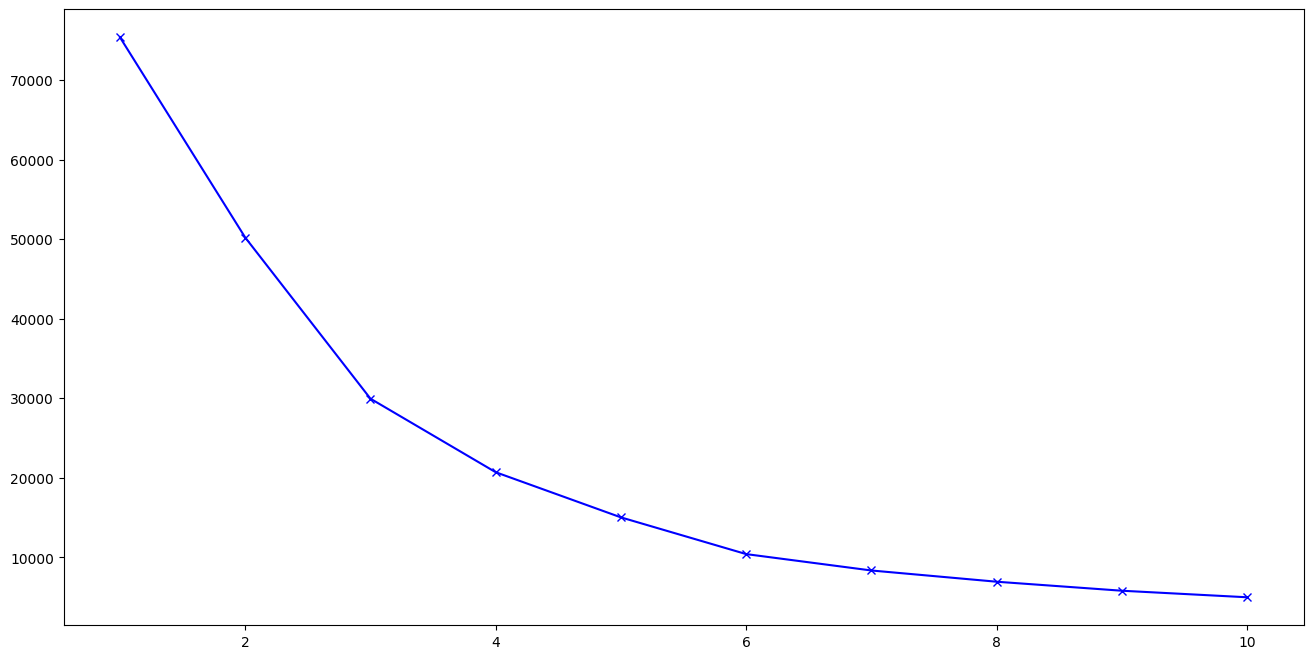

In [14]:
#explore the correct number of clusters
distortions = []
plt.figure(figsize=(16,8))
K = range(1,11)
for k in K: 
    Kmean = KMeans(n_clusters = k)
    Kmean.fit(dataPriceNeigh)
    distortions.append(Kmean.inertia_)

plt.plot(K, distortions, 'bx-')
#elbow isn't super clear, we are just going to take where the score begins to decrease less, so 4 

In [15]:
KmeanS = KMeans(n_clusters=4)
KmeanS.fit(dataPriceNeigh)
KmeanS.cluster_centers_
KmeanS.labels_

/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_2032/3740747922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPriceNeigh['id_cluster'] = KmeanS.labels_


<AxesSubplot: xlabel='neighbourhood_group', ylabel='price'>

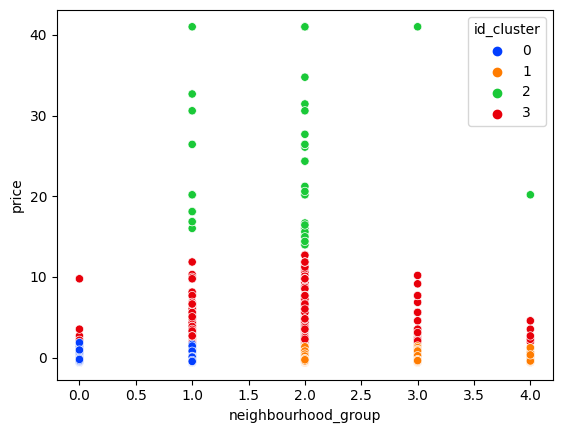

In [18]:
dataPriceNeigh['id_cluster'] = KmeanS.labels_
dataPriceNeigh.head()
sns.scatterplot(data = dataPriceNeigh, x = 'neighbourhood_group', y = 'price',hue = 'id_cluster',palette = 'bright')
dataPriceNeigh['price']
#we can classify the majority of the airbnbs with a price over ~12 do

/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_2032/3150035563.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df, x = 'availability_365', y = 'number_of_reviews',palette = 'bright')


<AxesSubplot: xlabel='availability_365', ylabel='number_of_reviews'>

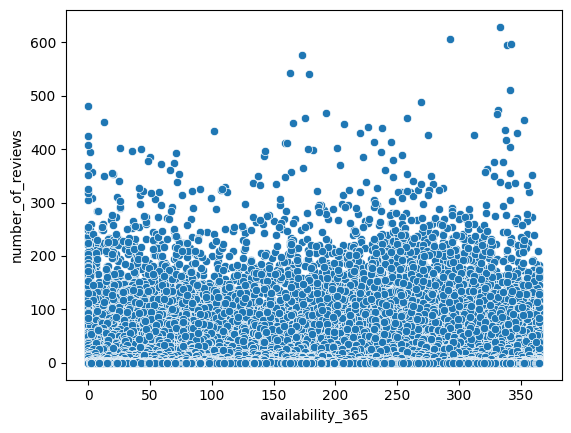

In [36]:

sns.scatterplot(data = df, x = 'availability_365', y = 'number_of_reviews',palette = 'bright')